In [72]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import joblib

In [73]:
data = pd.read_csv('microbes.csv')
data

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [74]:
data.isnull().sum()

Unnamed: 0         0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [75]:
ds = data.copy()
ds.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [76]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30527 non-null  int64  
 1   Solidity         30527 non-null  float64
 2   Eccentricity     30527 non-null  float64
 3   EquivDiameter    30527 non-null  float64
 4   Extrema          30527 non-null  float64
 5   FilledArea       30527 non-null  float64
 6   Extent           30527 non-null  float64
 7   Orientation      30527 non-null  float64
 8   EulerNumber      30527 non-null  float64
 9   BoundingBox1     30527 non-null  float64
 10  BoundingBox2     30527 non-null  float64
 11  BoundingBox3     30527 non-null  float64
 12  BoundingBox4     30527 non-null  float64
 13  ConvexHull1      30527 non-null  float64
 14  ConvexHull2      30527 non-null  float64
 15  ConvexHull3      30527 non-null  float64
 16  ConvexHull4      30527 non-null  float64
 17  MajorAxisLen

In [77]:
ds.describe()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.00000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,15263.00000,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,8812.53017,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7631.50000,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,15263.00000,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,22894.50000,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,30526.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [78]:
from sklearn.preprocessing import StandardScaler
ds = data.copy()

scaler = StandardScaler() # ................ Instantiate your algorithm

for i in ds.describe()[:2]>2000: # ........ In individual columns
    if ds[i].dtypes != 'O': # ......................... If the column is a number
        ds[i] = scaler.fit_transform(ds[[i]]) # .... Transform the column

ds.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,-1.731994,0.251578,-1.053782,0.812665,-1.343554,0.417081,0.707294,-1.460182,-0.084019,-1.304578,...,-1.322303,-0.159493,0.486660,-0.127081,-0.061375,-1.347138,0.095730,0.433369,0.989394,Spirogyra
1,-1.731881,-1.003537,-0.335344,0.229170,-0.944880,-0.064020,-0.716907,1.041639,0.123689,-0.904130,...,-0.911751,-0.051223,0.413149,0.156737,-0.040778,-0.952423,1.586816,-0.032279,0.989394,Spirogyra
2,-1.731767,-0.334142,0.095719,0.450808,-0.862167,-0.005739,0.002884,1.406646,0.019835,-0.813865,...,-0.831283,0.014942,0.298798,0.243532,-0.074763,-0.862865,-0.009523,0.128348,0.989394,Spirogyra
3,-1.731654,0.103918,-0.450294,1.653984,-0.127680,1.199870,0.141305,-0.275429,-0.499435,-0.346129,...,-0.351759,0.261557,0.903223,-0.099307,0.119878,-0.240940,0.078188,1.313402,0.989394,Spirogyra
4,-1.731540,-0.838649,0.210669,7.448229,-0.193850,16.318547,-0.575410,-1.394785,-10.884831,-0.118005,...,-0.134987,3.714168,4.243891,5.182143,4.310322,0.372694,-0.351596,14.351559,0.989394,Spirogyra


In [79]:
from sklearn.preprocessing import LabelEncoder
encoded = {}
for i in ds:
    encoder = LabelEncoder()
    ds['microorganisms'] = encoder.fit_transform(ds['microorganisms'])
    encoded['microorganisms_encoder'] = encoder
    joblib.dump(encoder, open('microorganisms_encoder.pkl', 'wb'))
encoded

{'microorganisms_encoder': LabelEncoder()}

In [80]:
print(ds.columns)

Index(['Unnamed: 0', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms'],
      dtype='object')


In [81]:
ds.drop('Unnamed: 0', axis=1, inplace=True)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

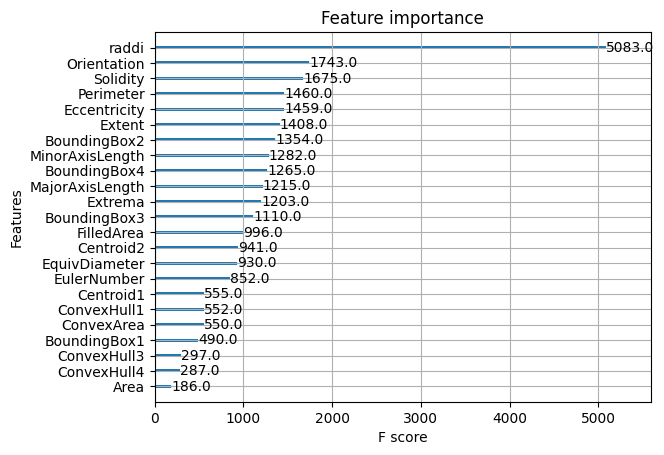

In [82]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb
model = xgb.XGBClassifier()

x = ds.drop('microorganisms', axis = 1)
y = ds.microorganisms

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [83]:
print(ds.columns)

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')


In [84]:
sel_cols = ['raddi', 'Orientation', 'Solidity', 'Perimeter',
            'Eccentricity', 'Extent', 'BoundingBox2', 'MinorAxisLength', 'MajorAxisLength', 'microorganisms']
ds = ds[sel_cols]
ds.head()

,raddi,Orientation,Solidity,Perimeter,Eccentricity,Extent,BoundingBox2,MinorAxisLength,MajorAxisLength,microorganisms
0,0.989394,-1.460182,0.251578,-0.127081,-1.053782,0.707294,0.086349,0.486660,-0.159493,6
1,0.989394,1.041639,-1.003537,0.156737,-0.335344,-0.716907,1.518112,0.413149,-0.051223,6
2,0.989394,1.406646,-0.334142,0.243532,0.095719,0.002884,-0.034402,0.298798,0.014942,6
3,0.989394,-0.275429,0.103918,-0.099307,-0.450294,0.141305,0.051849,0.903223,0.261557,6
4,0.989394,-1.394785,-0.838649,5.182143,0.210669,-0.575410,-1.583466,4.243891,3.714168,6


In [86]:
from sklearn.model_selection import train_test_split
X = ds.drop('microorganisms', axis=1)  
y = ds['microorganisms']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

# Model Evaluation
cross_validation = log_reg.predict(X_train) # ....................... Predict the training data
print(classification_report(cross_validation, y_train))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38      3877
           1       0.08      0.31      0.13       386
           2       0.00      0.00      0.00         0
           3       0.33      0.71      0.45       497
           4       0.24      0.40      0.30      1864
           5       0.63      0.51      0.57      2469
           6       0.00      0.00      0.00         9
           7       0.66      0.43      0.52      9079
           8       0.48      0.41      0.44      4101
           9       0.38      0.51      0.43      2139

    accuracy                           0.43     24421
   macro avg       0.32      0.36      0.32     24421
weighted avg       0.52      0.43      0.46     24421



In [90]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rand_model = RandomForestClassifier()

rand_model.fit(X_train, y_train)

# Model Evaluation
cross_validation = rand_model.predict(X_train) # ....................... Predict the training data
print(classification_report(cross_validation, y_train)) # ........... Check the accuracy of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3135
           1       1.00      1.00      1.00      1473
           2       1.00      1.00      1.00       845
           3       1.00      1.00      1.00      1070
           4       1.00      1.00      1.00      3118
           5       1.00      1.00      1.00      2018
           6       1.00      1.00      1.00       499
           7       1.00      1.00      1.00      5923
           8       1.00      1.00      1.00      3476
           9       1.00      1.00      1.00      2864

    accuracy                           1.00     24421
   macro avg       1.00      1.00      1.00     24421
weighted avg       1.00      1.00      1.00     24421



In [91]:
# Model Testing
pred = rand_model.predict(X_test) # ....................... Predicting the training data
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       743
           1       1.00      0.98      0.99       353
           2       1.00      0.99      1.00       237
           3       0.94      0.99      0.96       264
           4       1.00      1.00      1.00       770
           5       1.00      1.00      1.00       534
           6       0.79      0.96      0.86        92
           7       0.99      0.98      0.99      1513
           8       1.00      0.99      0.99       853
           9       1.00      0.99      0.99       747

    accuracy                           0.99      6106
   macro avg       0.97      0.99      0.98      6106
weighted avg       0.99      0.99      0.99      6106



<Axes: >

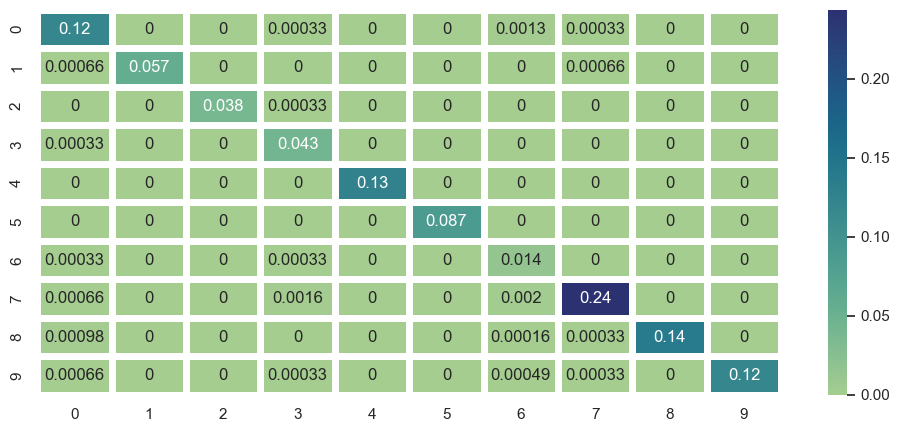

In [95]:

import numpy as np
revealer = confusion_matrix(pred, y_test)
plt.figure(figsize = (12,5))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [96]:
# save your model
joblib.dump(log_reg, open('MicrobepredictionModel.pkl', 'wb'))

In [97]:
ds['microorganisms'].value_counts()

microorganisms
7    7420
8    4320
0    3888
4    3888
9    3600
5    2552
1    1818
3    1350
2    1080
6     611
Name: count, dtype: int64

In [98]:
data['microorganisms'].value_counts()

microorganisms
Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Pithophora        1350
Penicillum        1080
Spirogyra          611
Name: count, dtype: int64